# Availability Prediction Summary

This algorithm is aimed to predict product availability based on the input from users. The forecast is made with the help of Prophet, a tool that can be used to make predictions about future events based on historical data. Given the historical data on the number of a product available at a certain store, seasonal effects, holidays and trends that may affect the amount of items available. Based on the number of the items available, it returns the answer covering the following ranges: 0 ('None'), 1-5 ('Few'), 6-10 ('Some'), or over 11 ('Many').

The code below illustrates the following steps:
    - to choose a product and a store from the general dataset with the products in the app
    - to provide data on availability of the product in the store (in this case - to generate random data, in real life scenario
    - to access the database storing the historical availability data)
    - to apply Prophet in order to fit the model and generate a half year forecast
    - to visualize the forecast
    - to create a plot showing the trend, weekly, and any additional user-defined seasonalities of the forecast
    - to illustrate the change-points in order to visually identify when these changes in trend occur
    - to return the range of the predicted value from the forecast
    

# Limitations and Potential Errors

The model represents an ideal scenario when there is daily input data on availability of the certain product in the certain store. However, in real life, it is highly unlikely to be this way. Moreover, the historical data used is only for one year which might be not sufficient enough to identify any patterns on such a relatively short timeline. Therefore, this may affect the credibility of the forecast. Nevertheless, the algorithm has been applied in order to demonstrate the way the algorithm would work in the best case scenario.

In [ ]:
pip install prophet

In [1]:
#To access the dataset with all products available at the stores

import csv
import pandas as pd
import numpy as np

df = pd.read_csv('Product_availability1.csv')
table=pd.DataFrame(df)
table

,store_id,product_code,product_name,quantity,brand,category,description
0,6,4104420240315,Joghurt mild,17,alnatura,NaN,NaN
1,82,4016249238155,Saatenliebe Mohn Avocado,3,Allos,"Pflanzliche Lebensmittel und Getränke, Pflanzl...","Bio, Vegetarisch, EU-Öko-Verordnung, Glutenfre..."
2,84,4016249173906,Linsen-Aufstrich Rote Linse Chili,19,Allos,"Pflanzliche Lebensmittel und Getränke, Pflanzl...","Bio, Vegetarisch, EU-Öko-Verordnung, Glutenfre..."
3,24,4104420018747,Dinkel Flakes,5,Alnatura,"Aliments et boissons à base de végétaux, Alime...","Bio, Végétarien, Bio européen, Agriculture non..."
4,47,4104420136540,Basis Porridge,1,Alnatura,"Pflanzliche Lebensmittel und Getränke, Pflanzl...","Bio, Bio 7 Initiative"
...,...,...,...,...,...,...,...
2257,79,7821511150212,veganer Aufschnitt Schinken Kräuter Art,15,dennree,NaN,NaN
2258,4,4021851597224,Kokos Milch,17,dennree,"Pflanzliche Lebensmittel und Getränke, Getränk...","Bio, EU-Öko-Verordnung, en:eg-oko-verordnung"
2259,30,2130589002718,Bio-Tiroler Bergkäse aus Walchsee,11,Dennree,"Milchprodukte, Fermentierte Lebensmittel, Ferm...",NaN
2260,66,4021851114384,"H-Milch Vollmilch 3,5 % Fett",14,dennree,"Milchprodukte, Milch, Homogenisierte Milch, H-...","Bio, EU-Öko-Verordnung, DE-ÖKO-037, en:eg-oko-..."


In [12]:
#To choose a certain product
table=table[['product_code','product_name']]
row=2258
display(table.loc[row:row])

,product_code,product_name
2258,4021851597224,Kokos Milch


In [2]:
#To access the dataset with the historical data on the availability of a certain product

history_data = pd.read_csv('history_data.csv')
table=pd.DataFrame(history_data)
table.drop(['Unnamed: 0'], axis=1)

,ds,y
0,2022-01-01,6
1,2022-01-02,7
2,2022-01-03,3
3,2022-01-04,7
4,2022-01-05,8
...,...,...
360,2022-12-27,3
361,2022-12-28,10
362,2022-12-29,6
363,2022-12-30,4


In [3]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
%matplotlib inline
from prophet import Prophet
import plotly.offline as py
from prophet.plot import add_changepoints_to_plot

In [ ]:
#To make a forecast on availability

def fit_and_forecast(table, periods, interval_width, changepoint_range=0.8):
    Prophet(interval_width=interval_width)
    # Instantiate the model
    model = Prophet(changepoint_range=changepoint_range)
    model.fit(history_data)
    future_df = model.make_future_dataframe(periods=periods)
    forecast_df = model.predict(future_df)
    return forecast_df, model, future_df
forecast_df, model, future_df = fit_and_forecast(table, 180, 0.95)
print(forecast_df.columns)
forecast_df[['yhat_lower', 'yhat_upper', 'yhat']].head(5)

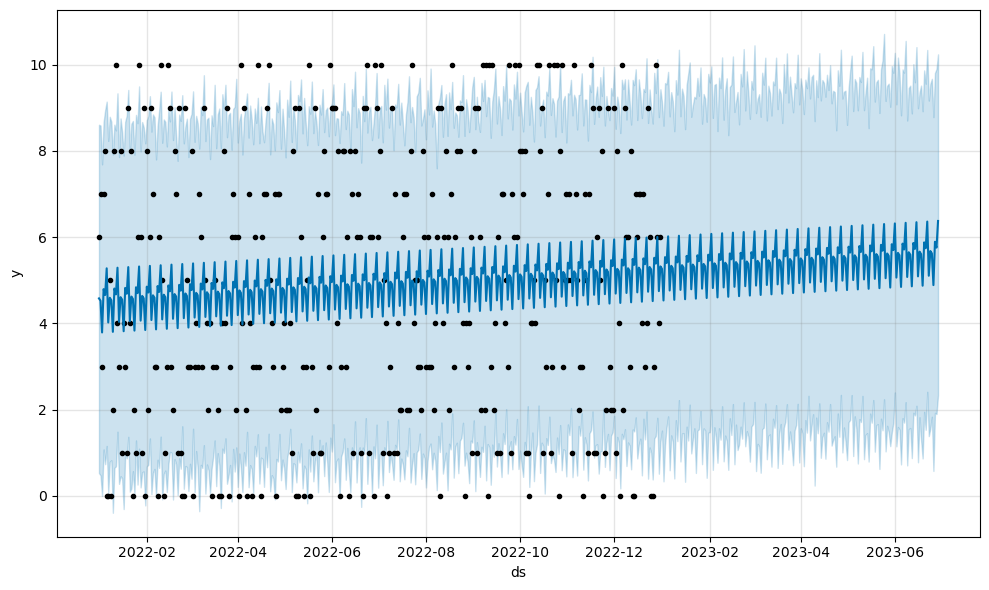

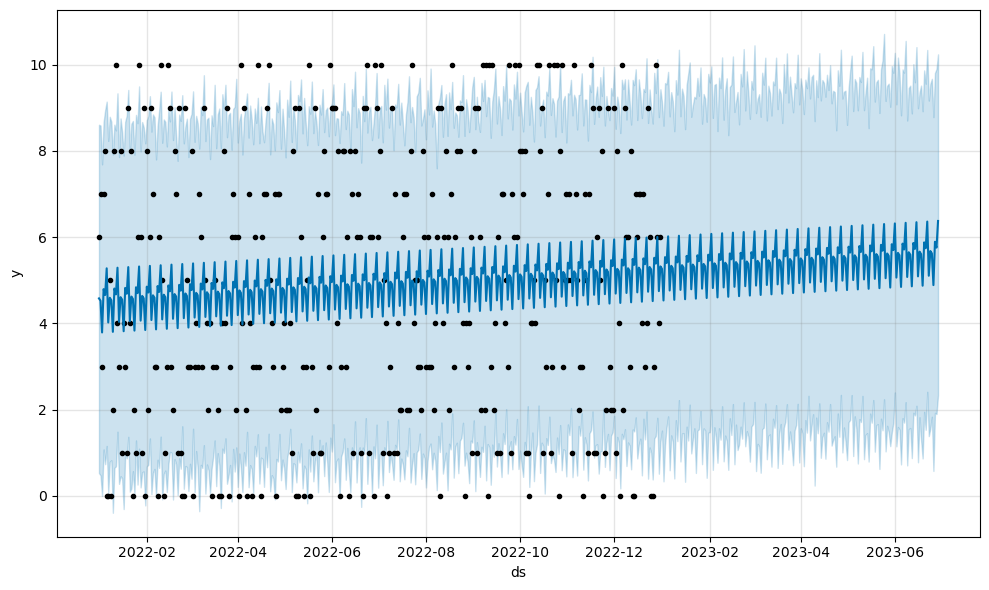

In [6]:
#To visualize the forecast

model.plot(forecast_df, uncertainty=True)

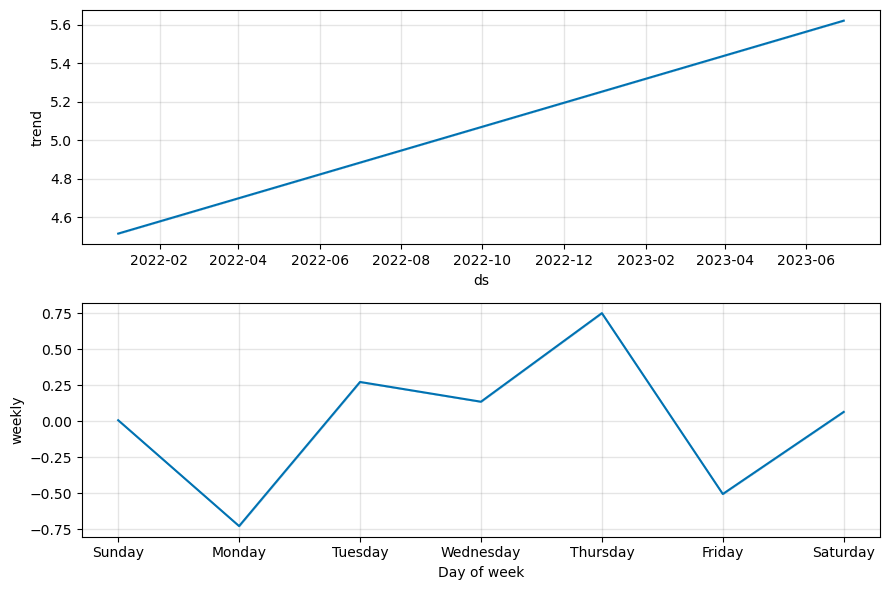

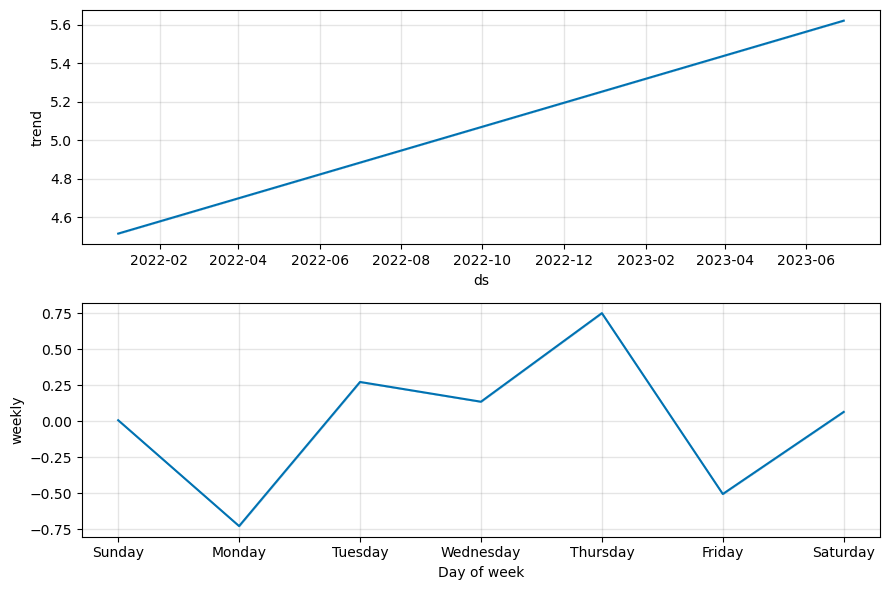

In [8]:
#To show a trend, weekly, and any additional seasonalities for further analysis

model.plot_components(forecast_df)

23:51:14 - cmdstanpy - INFO - Chain [1] start processing
23:51:14 - cmdstanpy - INFO - Chain [1] done processing


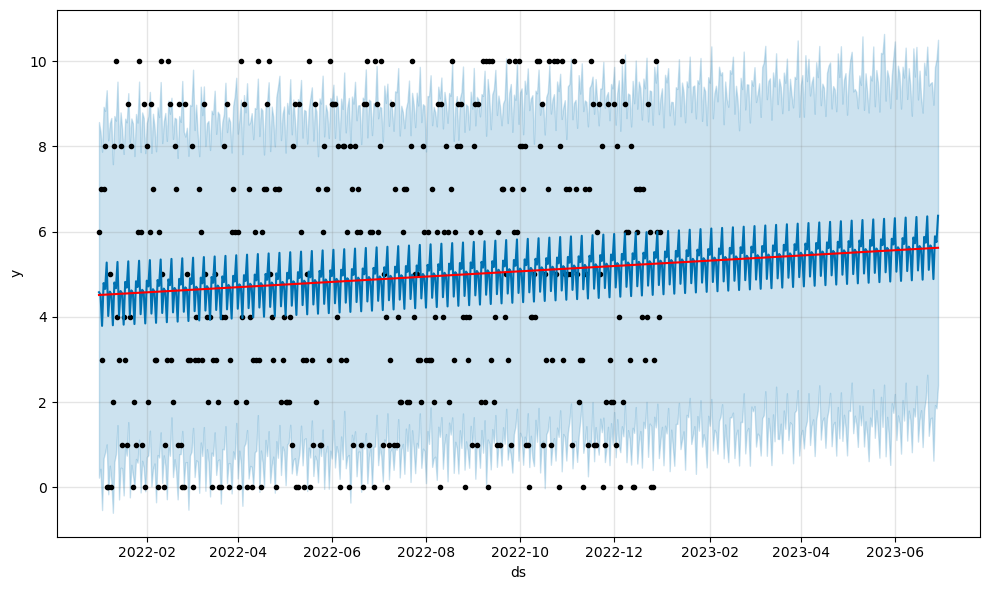

In [10]:
#To illustrate change points (for more long-term and sophisticated analysis of the trend)

forecast_df, model, future_df = fit_and_forecast(table, 180, 1.0)
axislist = add_changepoints_to_plot(model.plot(forecast_df).gca(), model, forecast_df)

In [45]:
#To return the prediction for the chosen product depending on the number of items available

future_date=pd.DataFrame({'ds':['2023-02-16']}) # 'date'
forecast=model.predict(future_date)
result=forecast['yhat']

if ([result>1.0] and [result<6.0]):
    print('Few')
elif (result>6.0):
        print('Some')
elif (result>11.0):
        print('Many')
else: #(forecast.loc[forecast['yhat']]==0):
    print('None')

# END

Few
